TRABAJO INDIVIDUAL 1 

In [1]:
#Para llevar a cabo la carga, extracción y modificación de datos de los archivos provistos, se utilizaran librerias.
#Las mismas se listan a continuacion
import pandas as pd
import numpy as np
import gzip
import ast
import json

EXTRACCIÓN DE LOS DATOS

In [70]:
# Creo una función que me permita cargar el archivo gzip reviews para luego convertirlo en DataFrame.
def l_a_c():
    with gzip.open("./user_reviews.json.gz", "rt", encoding="utf-8-sig") as file:
        return[ast.literal_eval(line.strip())
    for line in file]
datos = l_a_c()
df_reviews = pd.DataFrame(datos)    
df_reviews
#Luego realizo una consulta con head
df_reviews.head()

,user_id,user_url,reviews
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2..."
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014..."
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',..."
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2..."
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',..."


FEATURES
* User_id: identificador unico de usuario
* User_url: URL perfil del usuario
* reviews : Review de usuario en formato Json

In [71]:
# Debo desanidar la columna "reviews", para ello creo y utilizo esta función.
def extraer_values(df, columna, claves, nuevas_columnas):
       # Se deberá crear una lista de diccionarios para almacenar las filas extraídas
    extracted_rows = []
    # Deberá iterar a través de las filas del DataFrame
    for index, row in df.iterrows():
        columnai = row[columna]
        user_id = row["user_id"]
        # Luego comprobará si 'reviews' es una lista de diccionarios
        if isinstance(columnai, list):
            for item in columnai:
                extracted_row = {"user_id": user_id}
                for key, name in zip(claves, nuevas_columnas):
                    extracted_value = item.get(key, '')
                    extracted_row[name] = extracted_value
                extracted_rows.append(extracted_row)
    # Finalmente creará un nuevo DataFrame a partir de la lista de diccionarios
    df_new = pd.DataFrame(extracted_rows)
    return df_new
df = df_reviews
df_reviews = pd.DataFrame(df_reviews)
claves = ["funny", "posted", "last_edited", "item_id", "helpful", "recommend", "review"]
nuevas_columnas = ["funny", "posted", "last_edited", "item_id", "helpful", "recommend", "review","user_id"]
columna = "reviews"

df_reviews_desanidado= extraer_values(df, columna, claves, nuevas_columnas) 

In [ ]:
# Importo la libreria necesaria
from dateutil import parser

# A la columna posted le cambio el formato de fecha, para ello realizo la siguiente función.
def parse_date(date_str):
    try:
        return parser.parse(date_str.replace("posted", ""), fuzzy=True)
    except ValueError:
        return None
 # Se aplica la función de análisis de fecha y se reemplazan las filas con fechas incorrectas con NaN
df_reviews_desanidado["posted"] = df_reviews_desanidado["posted"].apply(parse_date)

#Se eliminan las filas con fechas incorrectas 
df_reviews_final = df_reviews_desanidado.dropna(subset=["posted"])

df_reviews_final.head()

In [ ]:
# Uno el dataframe anterior y el desanidado
df_reviews_final= pd.concat([df_reviews,df_reviews_desanidado], axis=1)
df_reviews_final.head(2)

In [12]:
# A continuación para realizar  el feature engineering debo importar las siguientes librerias
import nltk
from textblob import TextBlob

In [13]:
#Realizo una función que me permita determinar si la review de los usuarios es Negativa, Neutra y Positiva.
def sentiment_analysis(review):
    if isinstance(review, list) and len (review)>0:
        text= review[0].get("review","")
        sentiment = TextBlob(text).sentiment.polarity
        
        if sentiment < -0.2:
            return 0 # Negativo
        elif sentiment >= -0.2 and sentiment <= 0.2:
            return 1 # Neutro
        else:
            return 2 # Positivo
    else:
        return 1 # Valor predeterminado para valores faltantes    


In [14]:
# Luego aplico la función a la columna reviews y creo la columna sentiment_analysis
df_reviews_final["sentiment_analysis"]= df_reviews_final["reviews"].apply(sentiment_analysis)

In [15]:
#Elimino las columnas que no serán utilizadas 
df_reviews_final.drop(columns=["reviews","helpful","funny","last_edited","review"], inplace= True)
df_reviews_final.head()

,user_id,user_url,user_id,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,76561197970982479,2011-11-05,1250,True,1
1,js41637,http://steamcommunity.com/id/js41637,76561197970982479,2011-07-15,22200,True,1
2,evcentric,http://steamcommunity.com/id/evcentric,76561197970982479,2011-04-21,43110,True,2
3,doctr,http://steamcommunity.com/id/doctr,js41637,2014-06-24,251610,True,2
4,maplemage,http://steamcommunity.com/id/maplemage,js41637,2013-09-08,227300,True,1


In [ ]:
# Luego convierto el dataframes a formato csv.
df_reviews_final.to_csv("Reviews_csv", index=False)

In [3]:
# Paso siguiente importe el archivo comprimido user_items.json.gz, lo hice comprimido y luego lo convertí a DF
def l_a_c():
    with gzip.open("./users_items.json.gz", "rt", encoding="utf-8-sig") as file:
        return[ast.literal_eval(line.strip())
    for line in file]
datos = l_a_c()
df_items = pd.DataFrame(datos)    
df_items.head()

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


FEATURES
* User_id: identificador unico de usuario
* User_url: URL perfil del usuario
* reviews : Items de usuario en formato Json

In [4]:
# Debo desanidar la columna "Items", para ello utilizo esta función.
def extraer_values(df, columna, claves, nuevas_columnas):
       # Debe crear una lista de diccionarios para almacenar las filas extraídas
    extracted_rows = []
    # Luego iterar a través de las filas del DataFrame
    for index, row in df.iterrows():
        columnai = row[columna]
        user_id = row["user_id"]
        # Comprobar si 'items' es una lista de diccionarios
        if isinstance(columnai, list):
            for item in columnai:
                extracted_row = {"user_id": user_id}
                for key, name in zip(claves, nuevas_columnas):
                    extracted_value = item.get(key, '')
                    extracted_row[name] = extracted_value
                extracted_rows.append(extracted_row)
    # Para finalmente crear un nuevo DataFrame a partir de la lista de diccionarios
    df_new = pd.DataFrame(extracted_rows)
    return df_new
df = df_items
df_items = pd.DataFrame(df_items)
claves = ["item_id", "item_name", "playtime_forever", "playtime_2weeks"]
nuevas_columnas = ["item_id", "item_name", "playtime_forever", "playtime_2weeks","user_id"]
columna = "items"
df_items_desanidado = extraer_values(df, columna, claves, nuevas_columnas)

In [5]:
# Uno el dataframe anterior y el desanidado
df_items_final= pd.concat([df_items,df_items_desanidado], axis=1)
df_items_final.head()

,user_id,items_count,steam_id,user_url,items,user_id,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277.0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik...",76561197970982479,10,Counter-Strike,6,0
1,js41637,888.0,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik...",76561197970982479,20,Team Fortress Classic,0,0
2,evcentric,137.0,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest...",76561197970982479,30,Day of Defeat,7,0
3,Riot-Punch,328.0,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik...",76561197970982479,40,Deathmatch Classic,0,0
4,doctr,541.0,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea...",76561197970982479,50,Half-Life: Opposing Force,0,0


In [ ]:
#Elimino la columna items del dataframe original, ya que ahora esta desanidada
df_items_final.drop(columns=["items","playtime_2weeks"], inplace= True)
df_items_final.head()


In [ ]:
#Eliminar registros con valores NaN en todos los campos
df_items_final.dropna(how="all", inplace=True)
df_items_final


In [48]:
# Eliminar un rango de filas 
df_items_final = df_items_final.drop(df_items_final.index[799000:5153211])

In [50]:
# Luego convierto los dataframes a formato csv.
df_items_final.to_csv("Items_csv", index=False)

In [51]:
df_items_final_csv = pd.read_csv('Items_csv', low_memory=False)

In [ ]:
# Importo el último archivo comprimido steam_games.json.gz, lo hice comprimido y luego lo convertí a DF
with gzip.open("./steam_games.json.gz", "rt", encoding="utf-8") as f:
    data = f.readlines()
 
data = map(lambda x: x.rstrip(), data)
data_json_str = "[" + ','.join(data) + "]"
df_games = pd.read_json(data_json_str)
df_games


FEATURES
* publisher: Empresa publicadora del contenido
* genres: Genero del contenido
* app_name: Nombre del contenido
* title : Titulo del contenido
* url : URL de publicación del contenido
* release_date: Fecha de lanzamiento
* tags : etiquetas de contenido
* discount_price : precio de descuento
* reviews_url : Reviews de contenido
* specs : Especificaciones
* price : Precio del contenido
* early_access : acceso temprano
* id : identificador unico de contenido
* developer : desarrollador
* metascore: Score por metacritic

In [48]:
#Antes de hacer cambios en "release_date" debo tener la columna en un mismo formato str
df_games["release_date"] = df_games["release_date"].astype(str)

In [49]:
# Modifico fechas de release_date
from dateutil import parser
# A la columna posted le cambio el formato de fecha, para ello realizo la siguiente función.
def parse_date(date_str):
    try:
        return parser.parse(date_str.replace("release_date", ""), fuzzy=True)
    except ValueError:
        return None
 # Se aplica la función de análisis de fecha y se reemplazan las filas con fechas incorrectas con NaN
df_games["release_date"] = df_games["release_date"].apply(parse_date)

#Se eliminan las filas con fechas incorrectas 
df_games = df_games.dropna(subset=["release_date"])

df_games.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer,user_id,steam_id,items,items_count
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,4.49,[Single-player],4.99,0.0,761140.0,None,Kotoshiro,None,NaN,None,NaN
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,643980.0,None,Secret Level SRL,None,NaN,None,NaN
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,NaN,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,670290.0,None,Poolians.com,None,NaN,None,NaN
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,0.83,[Single-player],0.99,0.0,767400.0,None,彼岸领域,None,NaN,None,NaN
88315,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",http://steamcommunity.com/app/772540/reviews/?...,NaN,"[Single-player, Steam Achievements]",3.99,0.0,772540.0,None,Trickjump Games Ltd,None,NaN,None,NaN


In [ ]:
#Luego de desanidar ITEMS corroboré que es la misma info de user_reviews, por ende procedo a eliminar las columnas 
#que se repiten y no necesito.
# Del df_games debo eliminar la columna items,user_id y steam_id
df_games.drop(columns=["items", "user_id", "steam_id", "items_count"], inplace= True)
df_games.head()

In [51]:
# Creo un array de la columna "price", con el objetivo de reemplazo los campos necesarios
lista_price= np.array(df_games["price"])
lista_price

array([4.99, 'Free To Play', 'Free to Play', ..., 4.99, 1.99, 4.99],
      dtype=object)

In [ ]:
# Realizo modificaciones en la columna price
df_games.price = df_games.price.replace({
    "Free To Play": "0.0",
    "Free to Play": "0.0",
    "Free": "0.0",
    "Nan": "0.0",
    "Free Demo": "0.0",
    "Play for Free!": "0.0",
    "Install Now": "0.0",
    "Play WARMACHINE: Tactics Demo": "0.0",
    "Free Mod": "0.0",
    "Install Theme": "0.0",
    "Third-party": "0.0",
    "Play Now": "0.0",
    "Free HITMAN™ Holiday Pack": "0.0",
    "Play the Demo": "0.0",
    "Starting at $499.00": "0.0",
    "Starting at $449.00": "0.0",
    "Free to Try": "0.0",
    "Free Movie": "0.0",
    "Free to Use": "0.0"
})


In [ ]:
#Antes de hacer cambios en "release_date" debo tener la columna en un mismo formato str
df_games["price"] = df_games["price"].astype("Float64")

In [ ]:
#Eliminar registros con valores NaN en todos los campos
df_games.dropna(how="all", inplace=True)
df_games

In [ ]:
#Convierte en cero los registros que no poseen id
df_games["id"]= df_games["id"].fillna(0).astype(int)

In [ ]:
# Completa con ceros los campos vacios
df_games["metascore"]=df_games["metascore"].fillna(0.0)

In [ ]:
# Cambia a enteros
df_games["early_access"]=df_games["early_access"].astype("Int64")

In [ ]:
#Convierte en enteros los id del df_steam
df_games["id"]= df_games["id"].astype(int)

In [59]:
# Luego convierto los dataframes a formato csv.
df_games.to_csv("Games_csv", index=False)

In [ ]:
# Leer los CSV
df_reviews_final_csv = pd.read_csv("Reviews_csv", low_memory= False)
df_games_csv = pd.read_csv("Games_csv", low_memory= False)
df_items_final_csv = pd.read_csv("Items_csv", low_memory= False)

In [ ]:
df_reviews_final_csv

In [ ]:
df_games_csv

In [ ]:
df_items_final_csv

Análisis exploratorio de los datos: (Exploratory Data Analysis-EDA)

WordCloud

In [61]:
# Para realizar la nube de palabras se necesita importar la siguiente libreria:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [62]:
# Leemos el csv
df_wordcloud_games= pd.read_csv("./Games_csv",low_memory=False)  
df_wordcloud_items= pd.read_csv("./Items_csv",low_memory=False) 


In [63]:
df_wordcloud_games["title"]=df_wordcloud_games["title"].astype("str")
df_wordcloud_items["item_name"]=df_wordcloud_items["item_name"].astype("str")

In [64]:
# Concatenar todos los textos en una sola cadena
title_corpus = ' '.join(df_wordcloud_games["title"])
item_corpus= ' '.join(df_wordcloud_items["item_name"])

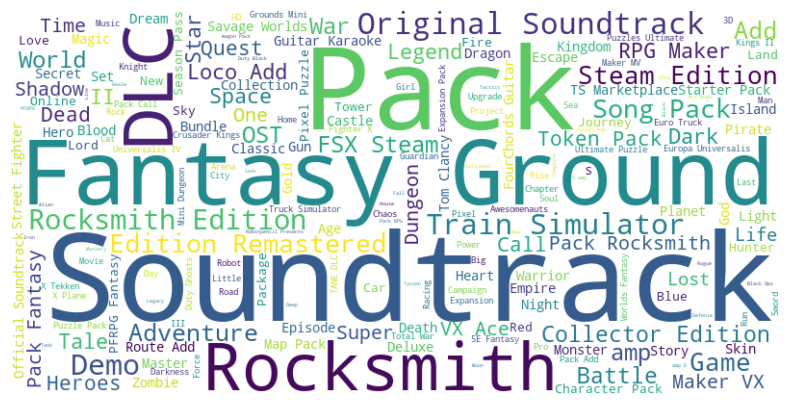

In [65]:
# Mostrar la nube de palabras
nube_palabras = WordCloud(width=800, height=400, background_color='white').generate(title_corpus)
plt.figure(figsize=(10, 5))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')
plt.show()

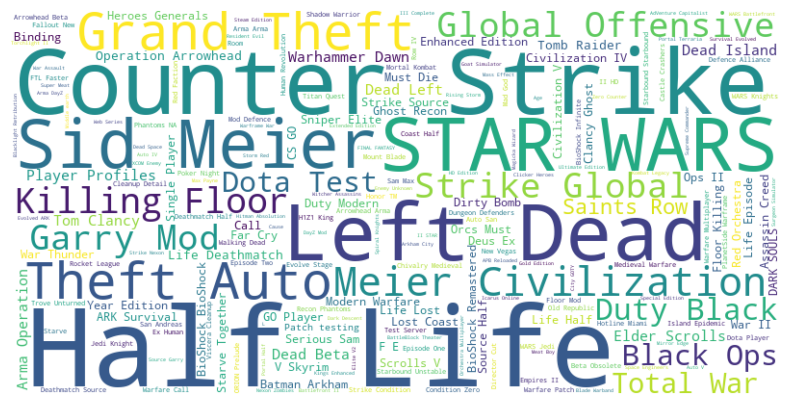

In [66]:
# Mostrar la nube de palabras
nube_palabras = WordCloud(width=800, height=400, background_color='white').generate(item_corpus)
plt.figure(figsize=(10, 5))
plt.imshow(nube_palabras, interpolation='bilinear')
plt.axis('off')
plt.show()

Modelo de aprendizaje automático

In [12]:
#Averigua los 5 juegos más recomendados

#Filtra las filas con recommended=True
df_reviews_final_csv_true =df_reviews_final_csv[df_reviews_final_csv["recommend"]]

#Cuenta la cantidad de recomendaciones por item_id
recomendaciones_por_item = df_reviews_final_csv_true.groupby("item_id")["recommend"].count().reset_index()

#Ordena en orden descendente
recomendaciones_por_item = recomendaciones_por_item.sort_values(by="recommend", ascending= False)

#Toma los tres primeros items 
cinco_mas_recomendados = recomendaciones_por_item.head(5)

#Combina con steam_games_final_csv para obtener los nombres de los items
cinco_mas_recomendados= pd.merge(cinco_mas_recomendados, df_games_csv[["id", "title"]],left_on="item_id", right_on="id",how= "left")
cinco_mas_recomendados


,item_id,recommend,id,title
0,440,3611,440.0,Team Fortress 2
1,730,3478,730.0,Counter-Strike: Global Offensive
2,4000,1685,4000.0,Garry's Mod
3,570,1458,NaN,NaN
4,304930,961,304930.0,Unturned


In [67]:
import matplotlib.pyplot as plt

In [14]:
#Informamos los juegos con mayor tiempo jugado
top_juegos_jugados= df_items_final_csv.sort_values(by="playtime_forever",ascending= False).head(10)

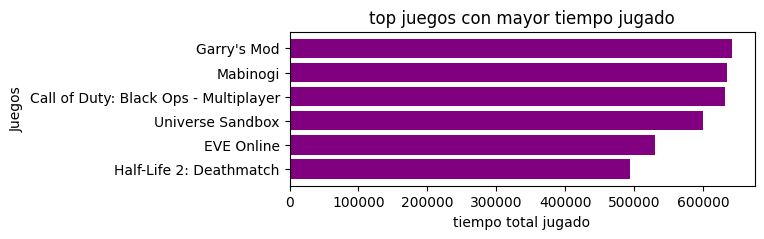

In [15]:
# Grafico los datos
plt.figure(figsize=(6,2))# Se usa para ajustar el tamaño del gráfico

plt.barh(top_juegos_jugados["item_name"], top_juegos_jugados["playtime_forever"], color= "purple")
plt.xlabel("tiempo total jugado") # Eje X
plt.ylabel("Juegos") #Eje Y
plt.title("top juegos con mayor tiempo jugado") # Titulo
plt.gca().invert_yaxis()

# Visualiza el gráfico
plt.show()


Tomamos una muestra aleatoria para probar la función que recomienda juegos según el ID del juego.

In [16]:
# Especifica el tamaño de la muestra
tamaño_muestra= 100
# Toma una muestra aleatoria del df original de steam_games
muestra_aleatoria= df_games_csv.sample(n=tamaño_muestra, random_state=42)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
# Obtén el juego con el item_id proporcionado por el usuario
user_item_id= 100 # Reemplaza con el item proporcionado por el usuario
target_game= muestra_aleatoria[muestra_aleatoria["id"]==user_item_id]
# Combina las etiquetas tagsy generos en una sola cadena de texto
# Limpia los valores nulos en la columna tags y genres y convierte todo a cadena de texto
target_game_tags_and_genres= "".join(target_game["tags"].fillna("").astype(str)+""+ target_game["genres"].fillna("").astype(str))
# Crea un vectorizador TF-IDF
tfidf_vectorizer = TfidfVectorizer()
# Aplica el vectorizador al juego de referencia y a todos los juegos
# Limpia los valores nulos en la columna tags y genres y convierte todo a cadena de texto
muestra_aleatoria["tags_and_genres"]= muestra_aleatoria["tags"].fillna("").astype(str) +""+ muestra_aleatoria["genres"].fillna("").astype(str)
tfidf_matrix = tfidf_vectorizer.fit_transform([target_game_tags_and_genres]+ muestra_aleatoria["tags_and_genres"].tolist())
# Calcula la similitud entre el juego de referencias y los demás juegos
similatary_matrix = cosine_similarity(tfidf_matrix)
#Ordena losjuegos por similitud 
similar_games_indices= similatary_matrix[0].argsort()[::-1]
# Recomienda los juegos mas similares
num_recomendation= 5
recomended_games= muestra_aleatoria.reset_index(drop=True).loc[similar_games_indices[1: num_recomendation + 1 ]]

# Devuelve la lsta de juegos recomendados
recomended_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,discount_price,specs,price,early_access,id,metascore,developer,tags_and_genres
36,SOEDESCO Publishing,"['Adventure', 'Indie', 'Racing']",Defunct,Defunct,http://store.steampowered.com/app/359350/Defunct/,2016-01-29,"['Adventure', 'Racing', 'Indie', 'Fast-Paced',...",http://steamcommunity.com/app/359350/reviews/?...,NaN,"['Single-player', 'Steam Achievements', 'Full ...",9.99,0,359350,0.0,Freshly Squeezed,"['Adventure', 'Racing', 'Indie', 'Fast-Paced',..."
26,TopWare Interactive,"['Action', 'Casual', 'Strategy']",Check vs. Mate - Dark Desert DLC,Check vs. Mate - Dark Desert DLC,http://store.steampowered.com/app/339620/Check...,2014-12-22,"['Strategy', 'Action', 'Casual']",http://steamcommunity.com/app/339620/reviews/?...,NaN,"['Single-player', 'Multi-player', 'Cross-Platf...",6.99,0,339620,0.0,Targem Games,"['Strategy', 'Action', 'Casual']['Action', 'Ca..."
27,SCS Software,"['Indie', 'Simulation']",Euro Truck Simulator 2 - Swiss Paint Jobs Pack,Euro Truck Simulator 2 - Swiss Paint Jobs Pack,http://store.steampowered.com/app/461246/Euro_...,2016-07-15,"['Simulation', 'Indie']",http://steamcommunity.com/app/461246/reviews/?...,NaN,"['Single-player', 'Downloadable Content', 'Ste...",0.99,0,461246,0.0,SCS Software,"['Simulation', 'Indie']['Indie', 'Simulation']"
28,baKno Games,"['Adventure', 'Casual', 'Indie']",SpacePig,SpacePig,http://store.steampowered.com/app/748910/Space...,2008-12-30 00:00:00,"['Adventure', 'Indie', 'Casual']",http://steamcommunity.com/app/748910/reviews/?...,NaN,['Single-player'],4.99,0,748910,0.0,baKno Games,"['Adventure', 'Indie', 'Casual']['Adventure', ..."
29,NaN,NaN,Medieval Blocks - Substance Designer Tutorial,Medieval Blocks - Substance Designer Tutorial,http://store.steampowered.com/app/441450/Medie...,2016-02-02,"['Animation & Modeling', 'Tutorial', 'Game Dev...",http://steamcommunity.com/app/441450/reviews/?...,NaN,NaN,5.99,0,441450,0.0,NaN,"['Animation & Modeling', 'Tutorial', 'Game Dev..."


Creamos el endpoint de recomended_games

In [21]:
from fastapi import FastAPI

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

app= FastAPI()

# Cargar el csv
df_games_csv= pd.read_csv("./Games_csv")

@app.get("/recomendacion_juego/{product_id}")
async def recomendacion_juego(product_id:int):
    try: 
        # Obtiene el juego de referencia
        target_game= df_games_csv[df_games_csv["id"]== product_id]
        if target_game.empty:
            return{"message: No se encontró el juego de referencia"}
        # Combina las etiquetas tags y genres en una sola cadena de texto
        target_game_tags_and_genres= " " .join(target_game["tags"].fillna(" ").astype(str) + " " + target_game["genres"].fillna(" ").astype(str))
        
        #Crea un vectorizador TF-IDF
        tfidf_vectorizer =TfidfVectorizer()
        
        # Configura el tamaño del lote para la lectura del juego
        chunk_size = 100 # Tamaño del lote
        similarity_scores= None
        
        # Procesa los juegos por lotes aplicando chunks
        for chunk in pd.read_csv("./Games_csv", chunksize=chunk_size):
            # Combina las etiquetas tags y genres en una sola cadena de texto
            chunk_tags_and_genres= " " .join(chunk["tags"].fillna(" ").astype(str) + " " + chunk["genres"].fillna(" ").astype(str)) 
            # Aplica el vectorizador TF-IDF al lote actual de juegos y al juego de referencia
            tfidf_matrix = tfidf_vectorizer.fit_transform([target_game_tags_and_genres, chunk_tags_and_genres])
            # Calcula la similitud entre el juego de referencia y los juegos del lote actual
            if similarity_scores is None:
                similarity_scores = cosine_similarity(tfidf_matrix)
            else:
                similarity_scores = cosine_similarity(tfidf_matrix, X=similarity_scores)
        if similarity_scores is not None:
            # Obtiene los índices de los juegos similares 
            similar_games_indices = similarity_scores[0].argsort()[::-1]
            # Recomienda los juegos más similares 
            num_recomendation = 5
            recomended_games = df_games_csv[similar_games_indices[1:num_recomendation + 1]]
            # Devueve la lista con los juegos recomendados 
            return recomended_games[["app_name", "tags","genres"]].to_dict(orient="records" )
        
        return {"message":" No se encontraron juegos similares"}
    except Exception as e:
        return {"Message": f"Error: {str(e)}"}           

Funciones

In [79]:
#1 - Debe devolver cantidad de dinero gastado por el usuario, el porcentaje de recomendación en base a reviews.recommend y cantidad de items.

def userdata(user_id):
    # Filtra las revisiones del usuario especifico
    user_reviews = df_reviews_final_csv[df_reviews_final_csv["user_id.1"] == user_id]   
    # Filtra los juegos jugados por el usuario
    game_id = user_reviews["item_id"].unique()
    user_steam_games = df_games_csv[df_games_csv["id"].astype(int).isin(game_id)]
    # Calcula la cantidad de dinero gastado por el usuario
    user_steam_games.loc[:, "price"] = user_steam_games["price"].replace("$", " ").astype(float)
    dinero_gastado = user_steam_games["price"].sum()

    # Calcula el porcentaje de recomendación promedio de los juegos jugados por el usuario
    user_reviews.loc[:, "recommend"] = user_reviews["recommend"].astype(bool)
    porc_recomendacion = user_reviews["recommend"].mean() * 100

    # Calcula la cantidad de items que posee un usuario
    num_items = len(game_id)

    # Crear un diccionario con los resultados
    user_data = {
        "dinero_gastado": dinero_gastado,
        "porc_recomendacion": porc_recomendacion,
        "num_items": num_items
    }

    return user_data


In [80]:

# Pruebo la función anterior
# Reemplazar tu_user_id_aqui con el ID del usuario que deseas consultar.
user_id= "LydiaMorley"
# Llama a la función userdata con el user_id especifico
resultado_usuario= userdata(user_id)

# Imprime el resultado
print("Cantidad de dinero gastado:", resultado_usuario["dinero_gastado"])
print("Porcentaje de recomendación:", resultado_usuario["porc_recomendacion"])
print("num_items:", resultado_usuario["num_items"])

Cantidad de dinero gastado: 14.99
Porcentaje de recomendación: 100.0
num_items: 3


In [81]:
#2 - Debe devolver cantidad de usuarios que realizaron reviews entre las fechas dadas y, el porcentaje de recomendación de los mismos en base a reviews.recommend

def count_reviews(start_date: str, end_date: str):
    # Supongamos que los datos están almacenados en un DataFrame llamado 'reviews'
    # con columnas 'date' (para la fecha) y 'recommend' (para la recomendación)

    # Filtrar las reviews entre las fechas dadas
    reviews_between_dates = df_reviews_final_csv[(df_reviews_final_csv['posted'] >= start_date) & (df_reviews_final_csv['posted'] <= end_date)]

    # Calcular la cantidad de usuarios que realizaron reviews entre las fechas dadas
    num_users = len(reviews_between_dates)

    # Calcular el porcentaje de recomendación
    if num_users > 0:
        percentage_recommendation = (reviews_between_dates['recommend'].sum() / num_users) * 100
    else:
        percentage_recommendation = 0

    return num_users, percentage_recommendation



In [82]:
# Pruebo la función anterior
start_date = "2008"
end_date = "2012"

# Llama a la función count_reviews
num_users, percentage_recommendation = count_reviews(start_date, end_date)

# Imprime el resultado
print("Número de usuarios:", num_users)
print("Porcentaje de recomendación:", percentage_recommendation)


Número de usuarios: 598
Porcentaje de recomendación: 97.82608695652173


In [ ]:
#3 - 

In [ ]:
#4- 

In [ ]:
#5- 

In [83]:
#6 - Debe devolver según el año de lanzamiento, un registro de las reseñas de los usuarios
def sentiment_analysis(año: int):
    # Filtramos los DataFrames por año
    juegos_año = df_games_csv[df_games_csv["release_date"] == año]
    reviews_año = df_reviews_final_csv[df_reviews_final_csv["sentiment_analysis"] == año]

    # Obtenemos recuentos de sentimientos y los sumamos
    sentimientos_juegos = juegos_año["release_date"].value_counts().to_dict()
    sentimientos_finales = reviews_año["sentiment_analysis"].value_counts().to_dict()

    conteo_sentimientos = {"Negative": 0, "Neutral": 0, "Positive": 0}

    for sentimiento, count in sentimientos_juegos.items():
        if sentimiento in conteo_sentimientos:
            conteo_sentimientos[sentimiento] += count

    for sentimiento, count in sentimientos_finales.items():
        if sentimiento in conteo_sentimientos:
            conteo_sentimientos[sentimiento] += count

    return conteo_sentimientos



In [33]:
print(sentiment_analysis(2018))

{'Negative': 0, 'Neutral': 0, 'Positive': 0}
